 # Algoritmo genético

Los algoritmos genéticos funcionan iterando sobre generaciones de poblaciones y evaluando qué tan bien estas poblaciones resuelven un problema. Al final de la generación, se seleccionan los mejores individuos para producir la próxima generación.

## Abejas vs Pesticidas
 
El uso excesivo de agroquímicos en los campos está comprometiendo el futuro de las abejas, desencadenando consecuencias que pueden ir más allá de los aspectos ambientales pues estos insectos polinizan los principales cultivos del mundo. Se estima que el 75 por ciento de la alimentación humana depende directa o indirectamente de la acción de los insectos polinizadores.

### Conceptualización

Un pesticida es un compuesto químico que tiene la importancia para el control de plagas en la agricultura. Debido a lo anterior los pesticidas no solamente matan plagas de insectos que afectan los cultivos, sino que también poblaciones de abejas melíferas, las cuales benefician el medio ambiente.

Las abejas son los mayores polinizadores de muchas plantas silvestres y monocultivo. Motivo por el cual, su población es fundamental para la productividad agrícola mundial y es evidente que las alteraciones en sus poblaciones podrían derivar en significativas pérdidas económicas.

La situación actual de las abejas es preocupante, debido a que el censo poblacional ha disminuido drásticamente por el uso extensivo de pesticidas en monocultivos tecnificados que buscan potenciar el rendimiento de la producción.

Los pesticidas son sustancias producidas de forma natural o industrial para destruir organismos potencialmente perjudiciales para las plantas cultivadas y/o animales de producción. Así mismo, se clasifican de acuerdo con el tipo de peste que controlan en: insecticidas (contra insectos), herbicidas (flora arvense), rodenticidas (roedores), bactericidas (bacterias), fungicidas (hongos) y larvicidas (larvas).

Estas sustancias pueden ser tóxicas a su vez para las especies que comparten el sitio de fumigación y, dependiendo de la dosificación, pueden tener una acción letal o subletal; a la par, permanecer residualmente en el medio ambiente.

### Planteamiento

Con base a lo anterior un pesticida contempla tres propiedades inherentes, las cuales son composición, forma de aplicación y residualidad:

**Composición:** Está compuesto por varios químicos incluyendo un ingrediente activo que es el químico que mata, controla o repele plagas.

**Exposición:** La exposición de las abejas se puede presentar por contacto, por alimentación o por las dos situaciones combinadas.

**Aplicación:** Las formas de aplicación de los pesticidas con sus respectivas características, son espolvoreo, pulverización, fumigación, aplicación de cebos, tratamientos vía riego y aplicación en el suelo.

**Residuality:** La residualidad del pesticida es un resultado de diversos factores, como la forma y sitio de aplicación, dosis, grado de infestación de la plaga y nivel de control o riesgo, exposición a microorganismos y materia orgánica.

Teniendo en cuenta las características mencionadas de los pesticidas, se desea saber cómo deben combinarse estas cuatro características para saber el grado de toxicidad potencial del pesticida y así minimizar la tasa de mortalidad de las poblaciones de abejas melíferas. Para llegar a este resultado hay que tener presente que:

* El porcentaje de ingrediente activo en el compuesto puede ser variable.
* Algunos pesticidas son: Corrosivos, irritantes, inflamables o explosivos.
* La forma de aplicación puede ser cualquiera de las mencionadas anteriormente.
* La residualidad  depende de las condiciones de la aplicación.
* La exposición de las abejas a los pesticidas puede ser por contacto, alimentación o ambas.
* El grado de toxicidad potencial del ingrediente activo puede ser: De baja peligrosidad, nocivo, toxico, muy tóxico.

La idea es que el modelo se pueda aplicar para cualquier combinación de cultivo-plaga


# Librerías

In [191]:
import numpy as np
import random
import operator
import pandas as pd
import matplotlib.pyplot as plt

# Representación de los datos

Los **cromosomas** del individuo para encontrar una posible solución al problema de las Abejas vs Pesticidas, estan representados pos las siguientes clases:

* Cromosoma **Ingrediente** define el ingrediente activo utilizado para un determinado cultivo (Lista de posibles ingredientes activos utilizados para un determinado cultivo) presente en el compuesto y respectiva clasificación (Corrosivo, irritante, inflamable o explosivo).
* Cromosoma **Exposicion** define si la exposición que presentan las abejas mielíferas al ingreduente activo es por contacto, alimentación o ambas. 
* Cromosoma **Aplicacion** define la forma en la que es aplicado el pesticida en el cultivo (espolvoreo, pulverización, fumigación, aplicación de cebos, tratamientos vía riego y aplicación en el suelo)
* Cromosoma **Residualidad** define el tiempo en días que el ingrediente activo esta presente en el ecosistema

Cada uno de los **individuos** del algoritmo genético esta representado por la clase **Combinacion**, la cual es la unión de las clases anteriormente mencionadas más el porcentaje de concentración del ingrediente activo:

* Clase **Compuesto** define el nombre del ingrediente activo presente en el compuesto

In [192]:
class Ingrediente:
    def __init__(self, ingrediente = None, clasificacion = []):
        self.ingrediente = ingrediente
        self.clasificacion = clasificacion

class Exposicion:
    def __init__(self, forma = None):
        self.forma = forma

class Aplicacion:
    def __init__(self, tipo = None):
        self.tipo = tipo

class Residualidad:
    def __init__(self, tiempo = None):
        self.tiempo = tiempo

class Combinacion:
    def __init__(self, concentracion, ingrediente = Ingrediente(), exposicion = Exposicion(), aplicacion = Aplicacion(), residualidad = Residualidad()):
        self.concentracion = concentracion
        self.exposicion = exposicion
        self.ingrediente = ingrediente
        self.aplicacion = aplicacion
        self.residualidad = residualidad  

# ¿Cual es el problema a resolver?

El objetivo es calcular la toxicidad potencial de cada individuo por la combinación de la concentración de un ingrediente activo específico, la forma de exposición, el tipo de aplicación y la residualidad  para cualquier cultivo en el cual se aplique algún tipo de pesticida, vamos a simular un caso particular para un cultivo dado, aplicando varios posibles pesticidas especializados en el cultivo seleccionado.

## Problema

La simulación 

In [193]:
clasificacion = {
  1: 1, # Corrosivo
  2: 2, # Irritante
  3: 3, # Inflamable
  4: 4 # Explosivo
}

exposicion = {
  1: 1, # Contacto
  2: 2, # Alimentación
  3: 3 # Ambas
}

aplicacion = {
  1: 1, # Espolvoreo
  2: 2, # Contactopulverización
  3: 3, # Fumigación
  4: 4, # Aplicación de cebos
  5: 5, # Tratamientos vía riego
  6: 6 # Aplicación en el suelo
}

residualidad = {}
for i in range(1,90):
    residualidad[i] = i

## Aptitud
Para este caso, la aptitud de un individuo es el calculo de la toxicidad del mismo que esta dado por la combinación de la concentración de un ingrediente activo específico, la forma de exposición, el tipo de aplicación y la residualidad como se menciono anteriormente y dicha aptitud esta dada por la formula:

>$Aptitud=RC+[\sum_{i=1}^{N} RCI(Valor_{i})]+[\sum_{i=1}^{N} RFE(Valor_{i})]+[\sum_{i=1}^{N} RFA(Valor_{i})]+[\sum_{i=1}^{N} RTR(Valor_{i})]$

>$RC = 1/(1,1 - concentración)$

### Descripción

>**RC** = Riesgo por concentración 

>**RCI** = Riesgo por clasificación del ingrediente activo

>**RFE** = Riesgo por forma de exposición

>**RFA** = Riesgo por forma de aplicación

>**RTR** = Riesgo por tiempo de residualidad

Ya que  es importante definir una función de aptitud común para todos los individuos, está formula fue construida con base a la **tabla 1**. La función hace el sumatorio de puntos de riesgo acumulados por cada uno de los individuos y calcula la inversa de para definir la toxicidad potencial de cada individuo.

In [194]:
class Aptitud:
    def __init__(self, combinacion):
        self.combinacion = combinacion
        self.riesgo = 0
        self.aptitud= 0.0
    
    def sumaAptitud(self):
        suma = 1/ (1.1 - self.combinacion.concentracion)
        if self.combinacion.ingrediente.clasificacion in clasificacion:
            suma = suma + clasificacion[self.combinacion.ingrediente.clasificacion]
        if self.combinacion.exposicion.forma in exposicion:
            suma = suma + exposicion[self.combinacion.exposicion.forma]
        if self.combinacion.aplicacion.tipo in aplicacion:
            suma = suma + aplicacion[self.combinacion.aplicacion.tipo]
        if self.combinacion.residualidad.tiempo in residualidad:
            suma = suma + residualidad[self.combinacion.residualidad.tiempo]
        self.riesgo = suma
        return self.riesgo
    
    def calculoAptitud(self):
        self.aptitud = 1 / float(self.sumaAptitud())
        return self.aptitud

## Mutación y reproducción
El algoritmo crea las próximas generaciones utilizando dos métodos, ya sea mutando individuos individuales según una probabilidad, o "apareando" dos individuos para crear uno nuevo. Aquí definimos todas las funciones necesarias para realizar el algoritmo.

In [195]:
#Creamos la población inicial de forma aleatoría.
def poblacionInicial(cantidad):
    poblacion = []
    for i in range(0,cantidad):
        poblacion.append(Combinacion(
            concentracion=random.random(),
            ingrediente=Ingrediente("Ingrediente activo " + str(i + 1), random.randint(1, 4)),
            exposicion=Exposicion(random.randint(1, 3)),
            aplicacion=Aplicacion(random.randint(1, 6)),
            residualidad=Residualidad(random.randint(1, 90))
            )
        )
    return poblacion

#Ordena la población deacuerdo a su aptitud
def organizarAptitudes(poblacion):
    aptitudes = {}
    for i in range(0,len(poblacion)):
        aptitudes[i] = Aptitud(poblacion[i]).calculoAptitud()
    aptitudes_ordenadas=sorted(aptitudes.items(), key = operator.itemgetter(1), reverse = True)
    return aptitudes_ordenadas

#Creamos la función de selección
def seleccion(aptitudesOrdenadas, seleccionElitista):
    resultados = []
    df = pd.DataFrame(np.array(aptitudesOrdenadas), columns=["Index","Aptitud"])
    df['suma'] = df.Aptitud.cumsum()
    df['pareto'] = 100*df.suma/df.Aptitud.sum()
    
    for i in range(0, seleccionElitista):
        resultados.append(aptitudesOrdenadas[i][0])
    for i in range(0, len(aptitudesOrdenadas) - seleccionElitista):
        pick = 100*random.random()
        for i in range(0, len(aptitudesOrdenadas)):
            if pick <= df.iat[i,3]:
                resultados.append(aptitudesOrdenadas[i][0])
                break
    return resultados

#Crear vector de apareamiento
def apareamiento(poblacion, seleccionados):
    aparear = []
    for i in range(0, len(seleccionados)):
        index = seleccionados[i]
        aparear.append(poblacion[index])
    return aparear

#Crea dos hijos a partir de dos padres
def cruce(padre1, padre2, tasaCruce):
    hijos = []
    hijo = Combinacion(
            concentracion=padre1.concentracion,
            ingrediente=padre1.ingrediente,
            exposicion=padre1.exposicion,
            aplicacion=padre1.aplicacion,
            residualidad=padre1.residualidad
            )
    if random.random() < tasaCruce:
        hijo.concentracion = padre2.concentracion
    if random.random() < tasaCruce:
        hijo.ingrediente.clasificacion = padre2.ingrediente.clasificacion
    if random.random() < tasaCruce:
        hijo.exposicion.forma = padre2.exposicion.forma
    if random.random() < tasaCruce:
        hijo.aplicacion.tipo = padre2.aplicacion.tipo
    if random.random() < tasaCruce:
        hijo.residualidad.tiempo = padre2.residualidad.tiempo

    hijos.append(hijo)
    return hijos

#Crear función para cruzar toda la población
def cruzarPoblacion(aparear, seleccionElitista, tasaCruce):
    hijos = []
    length = len(aparear) - seleccionElitista
    pool = random.sample(aparear, len(aparear))
    for i in range(0,seleccionElitista):
        hijos.append(aparear[i])

    for i in range(0, length):
        child = cruce(pool[i], pool[len(aparear)-i-1], tasaCruce)
        hijos.append(child[0])
    return hijos

#Crea función de mutación
def mutacion(individuo, tasaMutacion):
    if random.random() < tasaMutacion:
        individuo.concentracion = random.random()
    if random.random() < tasaMutacion:
        individuo.ingrediente.clasificacion = random.randint(1, 4)
    if random.random() < tasaMutacion:
        individuo.exposicion.forma = random.randint(1, 3)
    if random.random() < tasaMutacion:
        individuo.aplicacion.tipo = random.randint(1, 6)
    if random.random() < tasaMutacion:
        individuo.residualidad.tiempo = random.randint(1, 90)
    return individuo

#Mutamos toda la población
def mutarPoblacion(poblacion, tasaMutacion):
    mutados = []
    for i in range(0, len(poblacion)):
        modificado = mutacion(poblacion[i], tasaMutacion)
        mutados.append(modificado)
    return mutados

#Crea una nueva generación
def nuevaGeneracion(generacionActual, seleccionElitista, tasaMutacion, tasaCruce):
    aptitudesOrdenadas = organizarAptitudes(generacionActual)
    seleccionados = seleccion(aptitudesOrdenadas, seleccionElitista)
    aparear = apareamiento(generacionActual, seleccionados)
    children = cruzarPoblacion(aparear, seleccionElitista, tasaCruce)
    cruce = mutarPoblacion(children, tasaMutacion)
    return cruce

## El algoritmo genético
Programamos el algoritmo genético con las funciones previas.

In [196]:
def algoritmo(poblacion, seleccionElitista, tasaMutacion, tasaCruce, generaciones):
    progress = [1 / organizarAptitudes(poblacion)[0][1]]
    print('Generación 0',"Riesgo: ",progress[0])

    nuevaPoblacion = poblacion
    for i in range(1, generaciones+1):
        #print("Generación: " + str(len(nuevaPoblacion)))
        nuevaPoblacion = nuevaGeneracion(nuevaPoblacion, seleccionElitista, tasaMutacion, tasaCruce)
        progress.append(1 / organizarAptitudes(nuevaPoblacion)[0][1])
        if i%50==0:
          print('Generación '+str(i),"Riesgo: ",progress[i])
        
    mejorIndividuoIndex = organizarAptitudes(nuevaPoblacion)[0][0]
    mejorIndividuo = nuevaPoblacion[mejorIndividuoIndex]
    
    plt.plot(progress)
    plt.ylabel('Riesgo')
    plt.xlabel('Generación')
    plt.title('Mejor aptitud vs Generación')
    plt.tight_layout()
    plt.show()

    
    
    return mejorIndividuo

## Pruebas
Realizamos las pruebas del algoritmo genetico previamente programado.

Generación 0 Riesgo:  9.209769232610357
Generación 50 Riesgo:  36.90985253792761
Generación 100 Riesgo:  94.90985253792762
Generación 150 Riesgo:  25.909852537927613
Generación 200 Riesgo:  46.90939010306084
Generación 250 Riesgo:  35.90928902315788
Generación 300 Riesgo:  34.90928902315788
Generación 350 Riesgo:  67.90928902315788
Generación 400 Riesgo:  22.909226809814832
Generación 450 Riesgo:  74.90917074127321
Generación 500 Riesgo:  27.909170741273215
Generación 550 Riesgo:  95.90917074127321
Generación 600 Riesgo:  50.90914573959377
Generación 650 Riesgo:  73.90914573959377
Generación 700 Riesgo:  21.909145739593768
Generación 750 Riesgo:  46.909137188573425
Generación 800 Riesgo:  57.90913718857342
Generación 850 Riesgo:  32.909137188573425
Generación 900 Riesgo:  93.90913718857342
Generación 950 Riesgo:  61.90913718857343
Generación 1000 Riesgo:  95.90913718857341


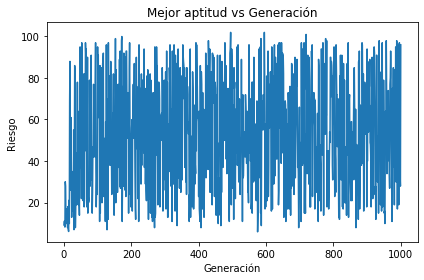

****************** Solución *************************
5.5995323267166164e-05
4
1
6
84


In [197]:
inicial=poblacionInicial(100)
solucion=algoritmo(poblacion=inicial, seleccionElitista=20, tasaMutacion=0.5, tasaCruce=0.5, generaciones=1000)
print("****************** Solución *************************")
print(solucion.concentracion)
print(solucion.ingrediente.clasificacion)
print(solucion.exposicion.forma)
print(solucion.aplicacion.tipo)
print(solucion.residualidad.tiempo)

## Investigaciones y Artículos

[1] [Guía de Evaluación de Riesgos de Plaguicidas para las Abejas](https://espanol.epa.gov/sites/production-es/files/2017-12/documents/120517_guia_de_evaluacion_de_riesgos_de_plaguicidas_para_las_abejas_update.pdf)

[2] [Abejas y Agrotóxicos](https://www.apiservices.biz/documents/articulos-es/abejas_y_agrotoxicos.pdf)

[3] [Los plaguicidas, adsorción y evolución en el suelo](https://digital.csic.es/bitstream/10261/12919/1/plaguicidas.pdf%3B)

[4] [Calculo de la toxicidad potencial de los plaguicidas](https://www.tdx.cat/bitstream/handle/10803/6827/06CAPITOL5.pdf?sequence=6&isAllowed=y)

[5] [Desarrollo de métodos para la reducción de la contaminación por plaguicidas en aguas subterráneas mediante la adición de residuos orgánicos a los suelos](https://idus.us.es/bitstream/handle/11441/41630/Tesis%20completa%20(enviar).pdf)

[6] [Daño colateral en abejas por la exposición a pesticidas de uso agrícola](http://www.scielo.org.co/pdf/entra/v14n1/1900-3803-entra-14-01-232.pdf)

[7] [Insecticidas más tóxico para las abejas ¿Por qué?](https://agriculturers.com/insecticidas-mas-toxico-para-las-abejas-por-que/)

[8] [Residualidad de un herbicida](https://www.rainbowconosur.com/uy/detalle-de-residualidad-de-un-herbicida-194)

